In [15]:
import requests
import traceback
import json
import csv
import re

In [10]:
# Now let reprocess the data files
import requests

# Define the URL to which the form submits data
# Assuming 'base_url' is the domain where the form resides, you need to replace it with the actual domain
base_url = 'http://localhost:5000'
endpoint = '/reprocess'
url = base_url + endpoint

# Make the POST request to the endpoint
response = requests.post(url)

# Check if the request was successful
if response.status_code == 200:
    print("Request successful... Context updated")
else:
    print(f"Request failed. Status code: {response.status_code}")


Request successful... Context updated


In [11]:
# Now lets query the model
# The URL to which the request is being sent
url = 'http://localhost:5000/query'

# Headers to be sent with the request
headers = {
    'Content-Type': 'application/json'
}

# Data to be sent in the request
data = {
    'query': 'Can you summarize the feedback from the participants?'
}

# Make the POST request
response = requests.post(url, headers=headers, data=json.dumps(data))

# Check the response
if response.status_code == 200:
    print("Success:", response.text)
else:
    print("Error:", response.status_code, response.text)

Success: {"qhid":"84427666-970b-49f1-b7a5-67f13b371054","response":"\nThe event effectively covered relevant topics such as system integration and simulation models but could benefit from more in-depth case studies on troubleshooting complex systems. The welcome packet provided a comprehensive overview of the schedule and objectives, with suggestions for including a glossary of technical terms and abbreviations to enhance understanding for all attendees.\n\nThe visualization software facilitated good understanding of simulation models but had an unintuitive interface that could be improved by redesigning it or providing a brief tutorial session at the start. The navy pilot's feedback emphasized the relevance of content, particularly focusing on flight dynamics and mission scenario simulations. They suggested more examples related to naval aviation and carrier-based operations for increased pertinence.\n\nThe welcome packet was informative with suggestions for adding a brief section on 

In [12]:
# Get the query history id - qhid
qhid = response.json()['qhid']
qhid

'84427666-970b-49f1-b7a5-67f13b371054'

In [13]:
# Now lets cointinue the discussion using the quid
# The URL to which the request is being sent
url = 'http://localhost:5000/query'

# Headers to be sent with the request
headers = {
    'Content-Type': 'application/json'
}

# Data to be sent in the request
data = {
    'query': 'Can you provide python code to plot the software scores by participants?',
    'qhid': qhid
}

# Make the POST request
response = requests.post(url, headers=headers, data=json.dumps(data))

# Check the response
if response.status_code == 200:
    print("Success:", response.text)
else:
    print("Error:", response.status_code, response.text)

Success: {"qhid":"84427666-970b-49f1-b7a5-67f13b371054","response":"\nTo create a bar chart that plots the software scores by participants, we can use the matplotlib library in Python. Here's an example code snippet:\n```python\nimport matplotlib.pyplot as plt\n\n# Assuming you have your data in a list of dictionaries where each dictionary represents a participant and their feedback on different aspects (e.g., event content, welcome packet, software), the scores can be extracted from the dictionary using keys like 'event_content', 'welcome_packet', etc. \n\n# Extracting the scores for the software aspect:\n```python\nsoftware_scores = [participant['software'] for participant in participants]\n```\nThen, you can create a bar chart with matplotlib:\n```python\nplt.bar(categories, scores)\nplt.xlabel('Category')\nplt.ylabel('Score')\nplt.title('Software Scores by Participants')\nplt.show()\n```\nHere, `categories` is a list of categories (e.g., 'event content', 'welcome packet', etc.) and

In [7]:
# Convert to json data
response_data = json.loads(response.text)

# Extracting the code string
code_string = response_data['response'].split("```python\n", 1)[1].rsplit("\n```", 1)[0]

# Function to correct the code
def correct_code(code):
    corrected_lines = []
    for line in code.split('\n'):
        # Detect lines that might be comments but are not marked as such
        if re.match(r"^[A-Z].*", line) and not re.match(r"^(import |from |class |def |#)", line):
            line = "# " + line
        corrected_lines.append(line)
    
    return '\n'.join(corrected_lines)

# Apply the correction
corrected_code = correct_code(code_string)
print(corrected_code)

import matplotlib.pyplot as plt
labels = ['Software', 'Welcome Packet']
sizes = [810, 910]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()


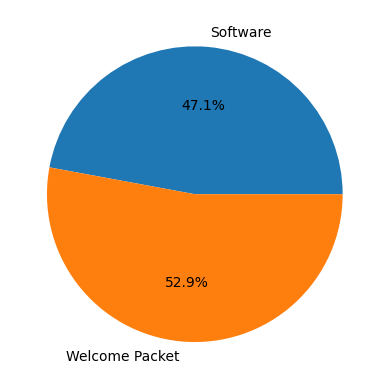

In [14]:
exec(corrected_code)